<a href="https://colab.research.google.com/github/Buntariga2545/AIPrototype2023/blob/main/Tensorflow__(Deep_Learning_Implementation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Sequential (ง่าย แต่สร้างได้แต่แบบไม่ซับซ้อน (วิ่งเป็นเส้นตรง))
2. Functional (ยากขึ้นมาอีกนิด แต่สามารถปรับเส้นทางให้มีความซับซ้อนได้)

~~3. Subclassing~~ (ยากสุด แต่สามารถแก้ไขได้ตามที่เราต้องการ)

# Sequential

### Import

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

### Define

In [14]:
# Define Sequential model with 3 layers
model = keras.Sequential(
    [
        keras.Input(shape=(4,)),
        layers.Dense(2, activation="relu", name="layer1"),
        layers.Dense(3, activation="relu", name="layer2"),
        layers.Dense(5,activation="softmax", name="output")
    ]
)

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 2)                 10        
                                                                 
 layer2 (Dense)              (None, 3)                 9         
                                                                 
 output (Dense)              (None, 5)                 20        
                                                                 
Total params: 39 (156.00 Byte)
Trainable params: 39 (156.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### ~Train (รวมกับการนำเข้าข้อมูลใน colab notebook หน้า)~

### Predict

In [16]:
# Call model on a test input
x = tf.ones((5, 4))

In [17]:
x

<tf.Tensor: shape=(5, 4), dtype=float32, numpy=
array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]], dtype=float32)>

In [18]:
y = model(x)

In [19]:
y

<tf.Tensor: shape=(5, 5), dtype=float32, numpy=
array([[0.15036693, 0.2514691 , 0.20191212, 0.17950088, 0.21675098],
       [0.15036693, 0.2514691 , 0.20191212, 0.17950088, 0.21675098],
       [0.15036693, 0.2514691 , 0.20191212, 0.17950088, 0.21675098],
       [0.15036693, 0.2514691 , 0.20191212, 0.17950088, 0.21675098],
       [0.15036693, 0.2514691 , 0.20191212, 0.17950088, 0.21675098]],
      dtype=float32)>

## สร้าง sequential แบบที่สอง

In [20]:
model2 = keras.Sequential()
model2.add(keras.Input(shape=(4,)))
model2.add(layers.Dense(2, activation="relu"))
model2.add(layers.Dense(3, activation="relu"))
model2.add(layers.Dense(5, activation="softmax"))

In [21]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 2)                 10        
                                                                 
 dense_3 (Dense)             (None, 3)                 9         
                                                                 
 dense_4 (Dense)             (None, 5)                 20        
                                                                 
Total params: 39 (156.00 Byte)
Trainable params: 39 (156.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## ปรับเปลี่ยน Network

In [22]:
model2.pop()

In [23]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 2)                 10        
                                                                 
 dense_3 (Dense)             (None, 3)                 9         
                                                                 
Total params: 19 (76.00 Byte)
Trainable params: 19 (76.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
model2.add(layers.Dense(6))

In [25]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 2)                 10        
                                                                 
 dense_3 (Dense)             (None, 3)                 9         
                                                                 
 dense_5 (Dense)             (None, 6)                 24        
                                                                 
Total params: 43 (172.00 Byte)
Trainable params: 43 (172.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
x = tf.ones((5, 4))
y = model2(x)
y

<tf.Tensor: shape=(5, 6), dtype=float32, numpy=
array([[ 0.23792048, -0.23209092,  0.83651245, -0.27274325, -0.52059627,
        -0.6780858 ],
       [ 0.23792048, -0.23209092,  0.83651245, -0.27274325, -0.52059627,
        -0.6780858 ],
       [ 0.23792048, -0.23209092,  0.83651245, -0.27274325, -0.52059627,
        -0.6780858 ],
       [ 0.23792048, -0.23209092,  0.83651245, -0.27274325, -0.52059627,
        -0.6780858 ],
       [ 0.23792048, -0.23209092,  0.83651245, -0.27274325, -0.52059627,
        -0.6780858 ]], dtype=float32)>

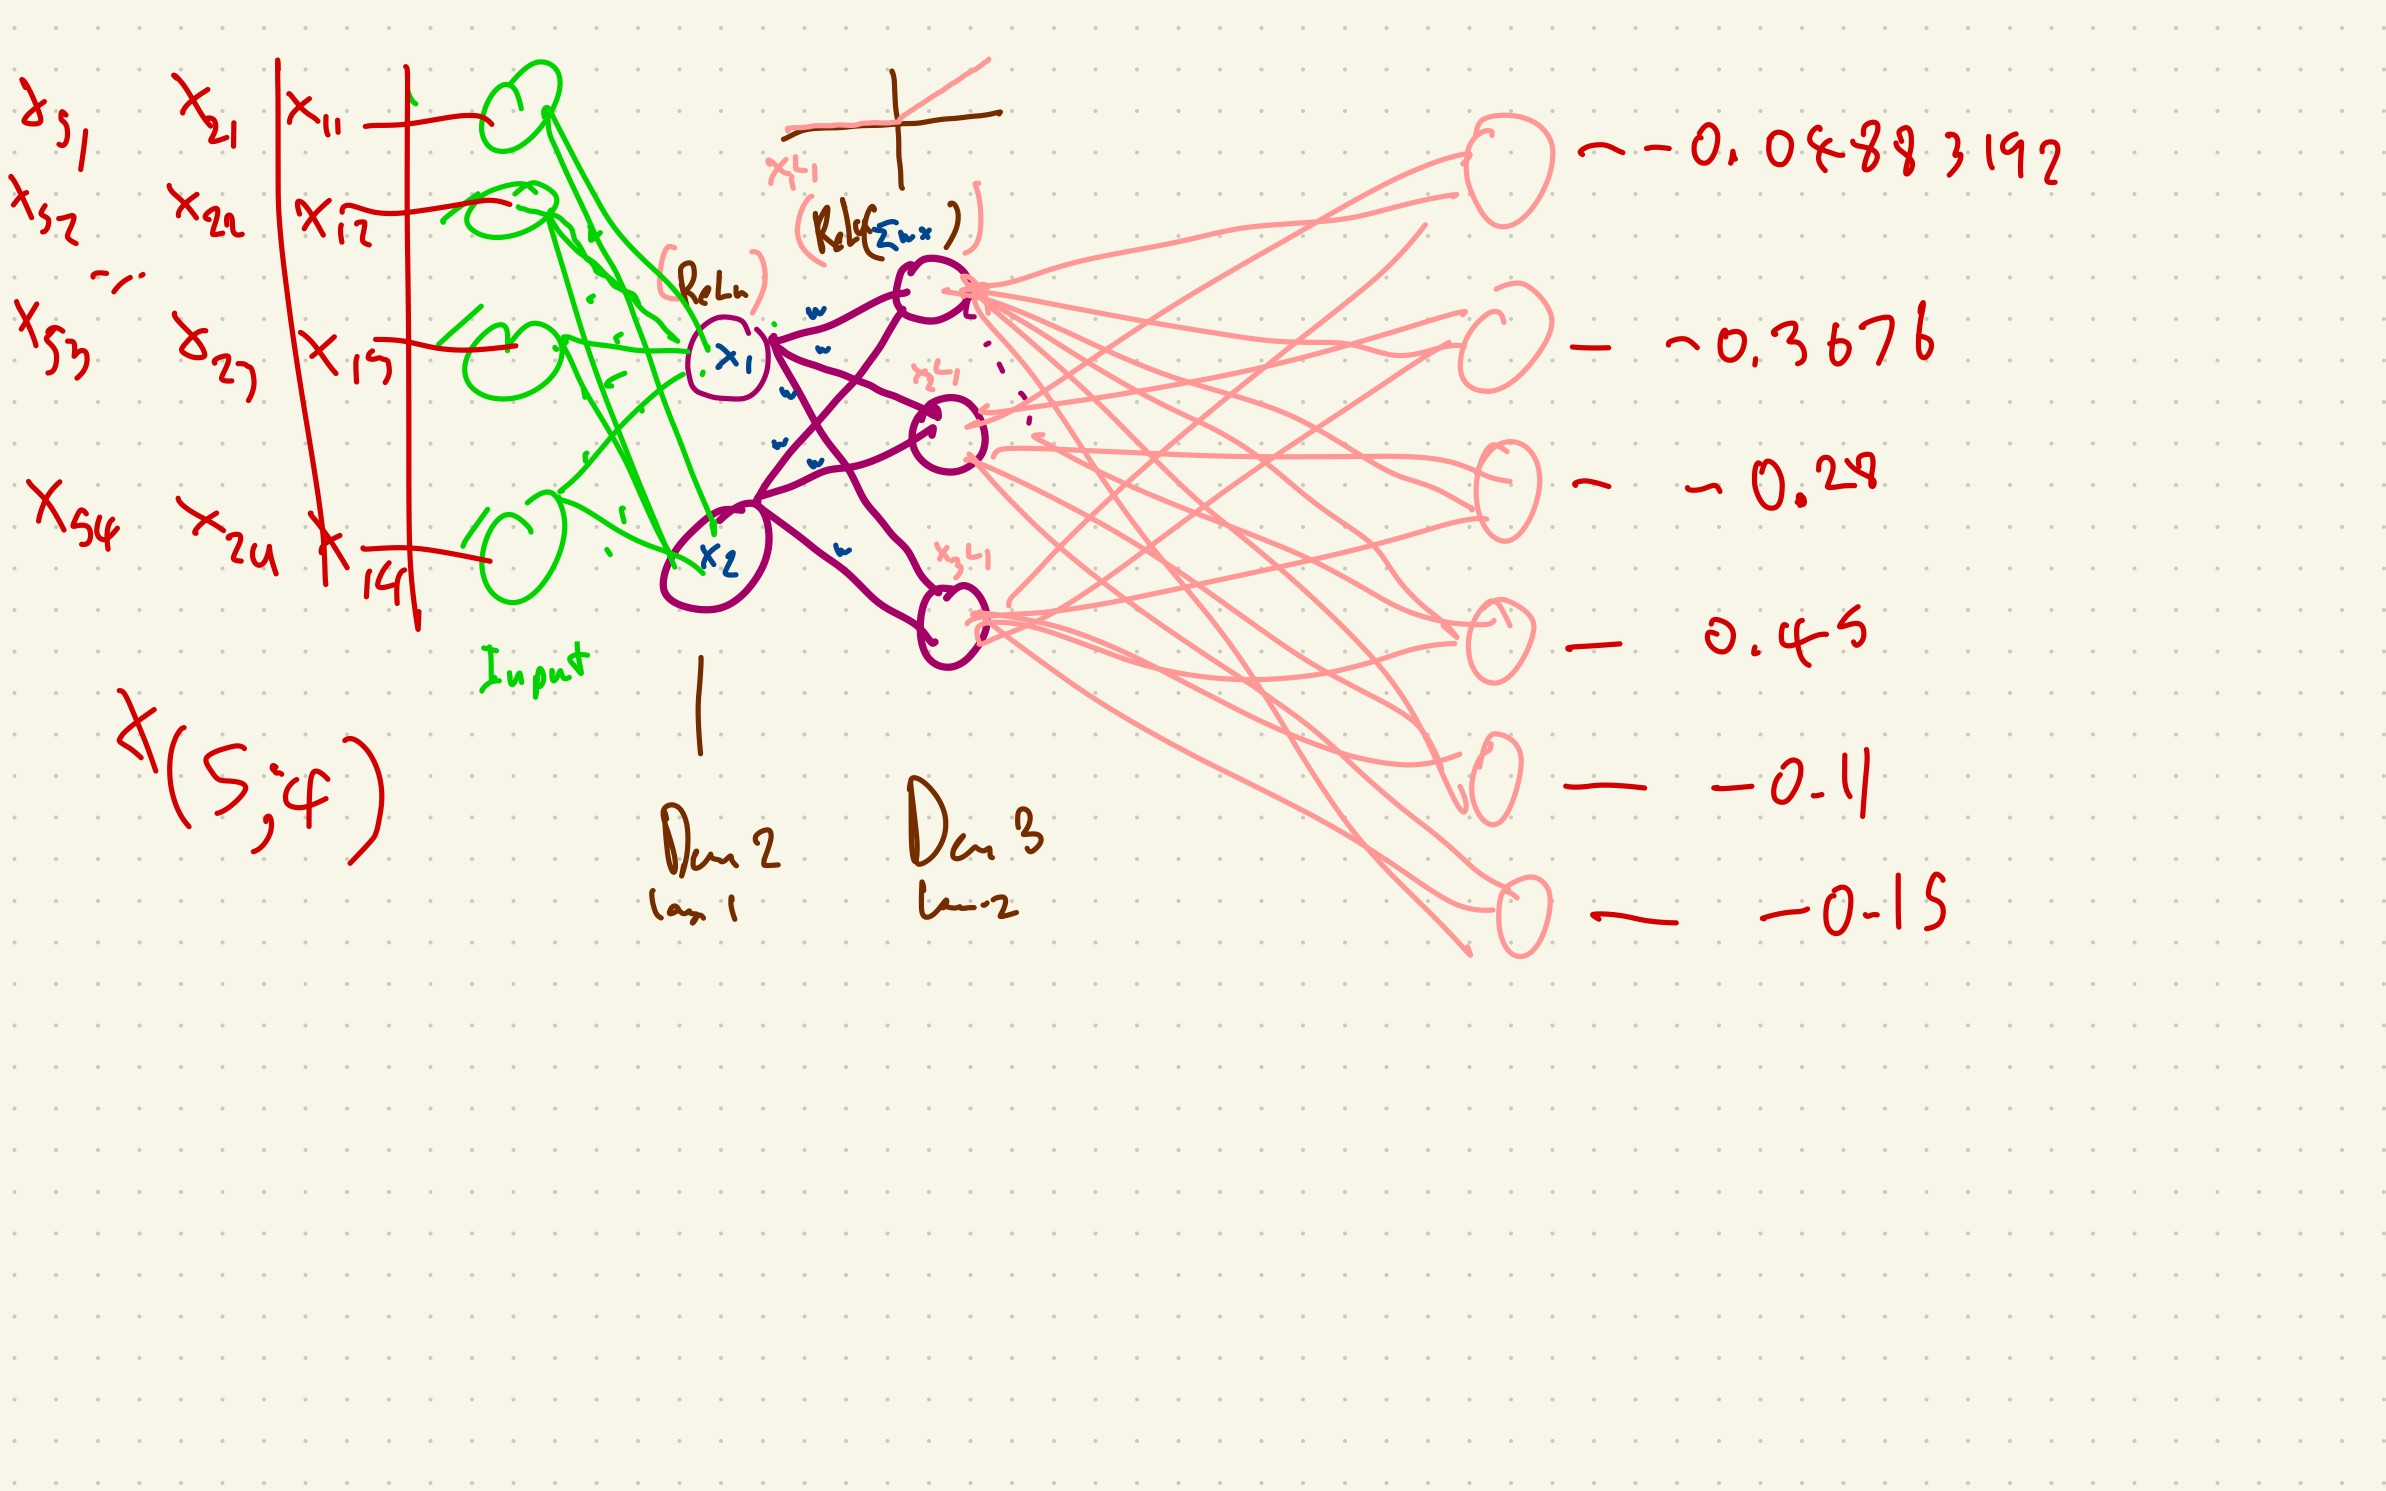

# ลองเทรน Sequential model ที่สร้างขึ้นเอง

In [2]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

## load data

In [27]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


### แปลงค่าเป็น 0-1 เพื่อนำเข้า network

In [28]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

### plot รูปตัวอย่าง

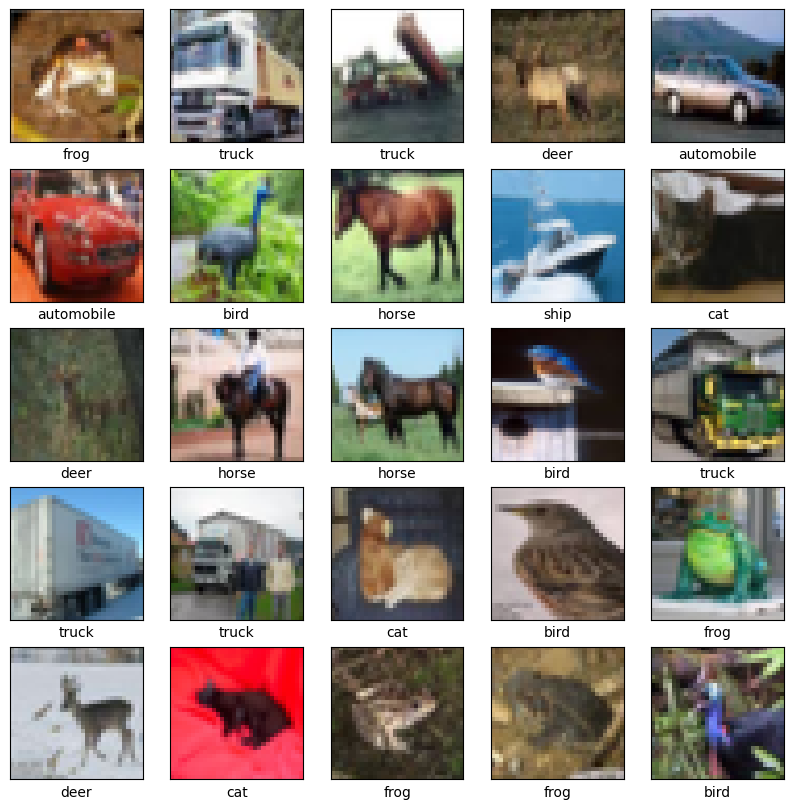

In [29]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### Define

In [30]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 5632

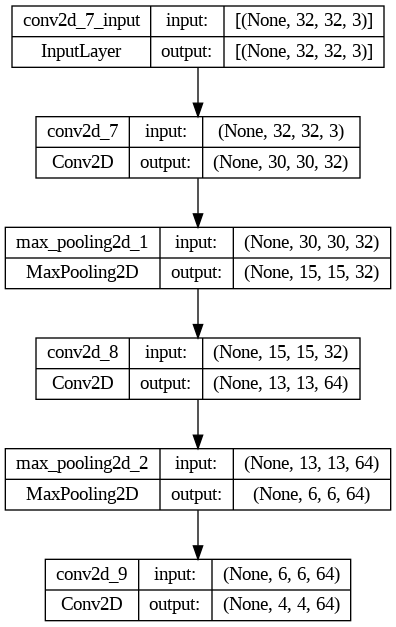

In [32]:
keras.utils.plot_model(model,show_shapes=True)

### ต่อด้วย flatten และ dense เพื่อทำนาย

In [33]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [34]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)             

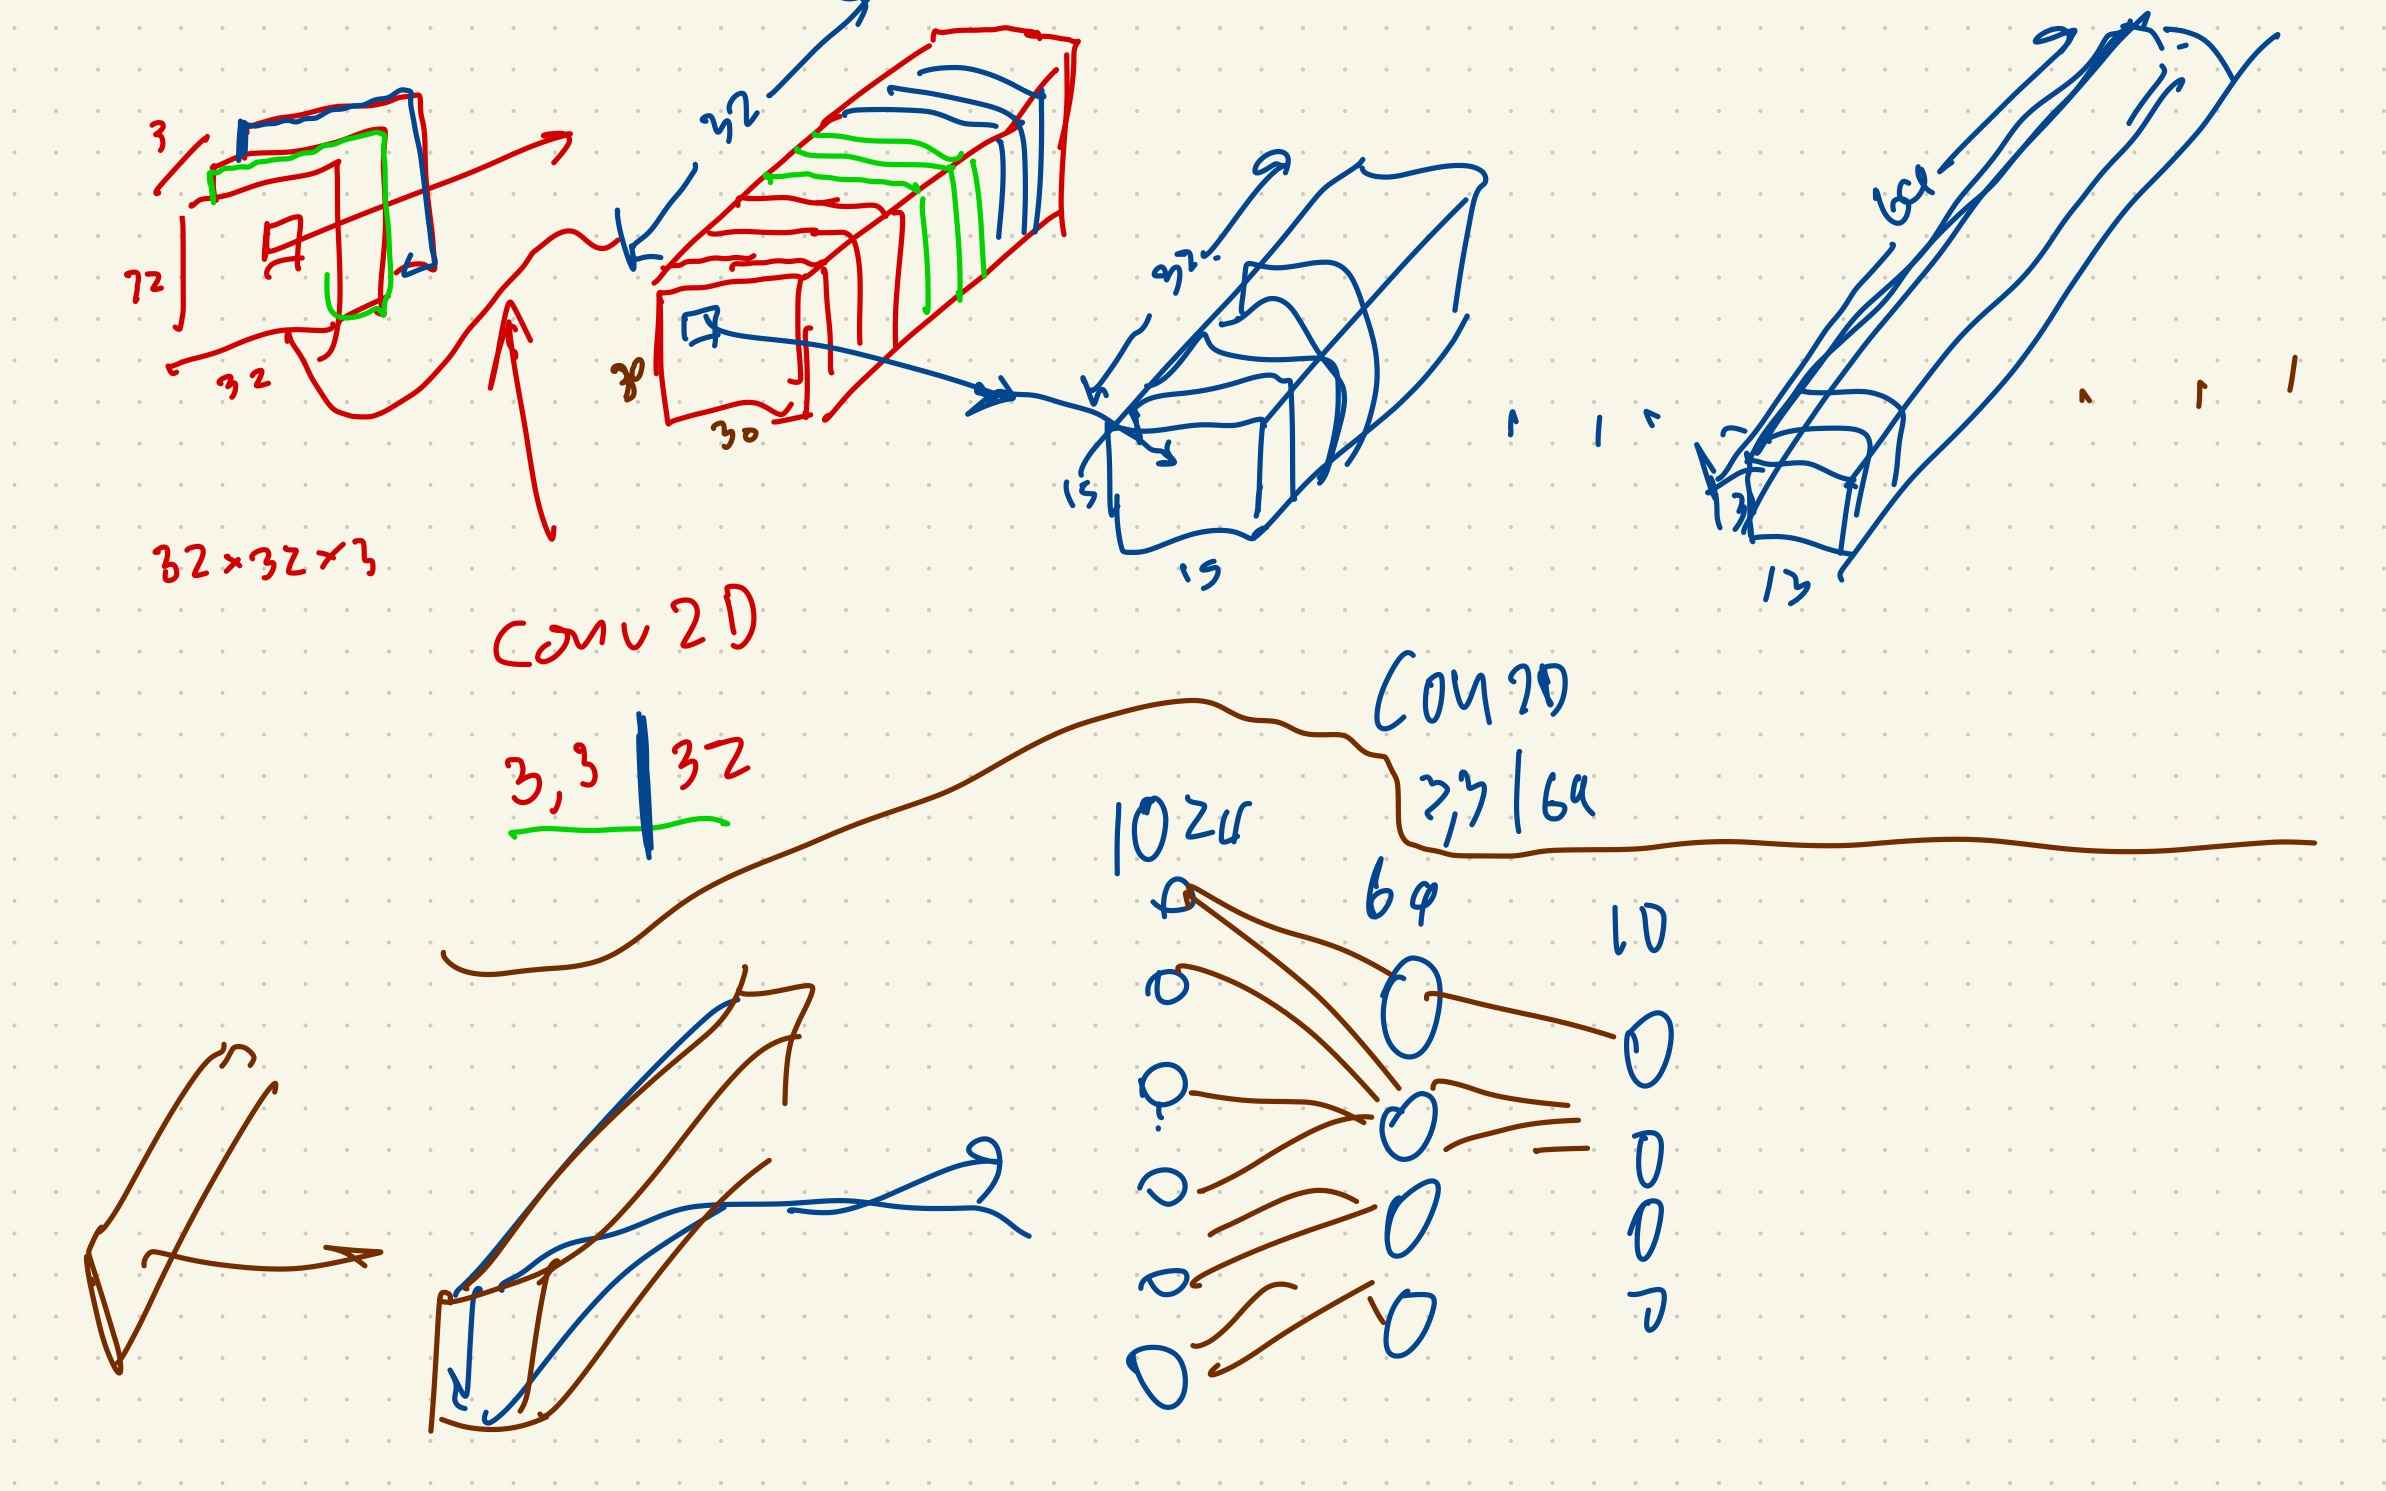

### Define training parameters

In [35]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Train

In [36]:
train_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [37]:
history = model.fit(train_images, train_labels, epochs=2,
                    validation_data=(test_images, test_labels))

Epoch 1/2
1563/1563 [==============================] - 11s 5ms/step - loss: 1.5376 - accuracy: 0.4368 - val_loss: 1.2727 - val_accuracy: 0.5373
Epoch 2/2
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1837 - accuracy: 0.5812 - val_loss: 1.0837 - val_accuracy: 0.6173


### Test

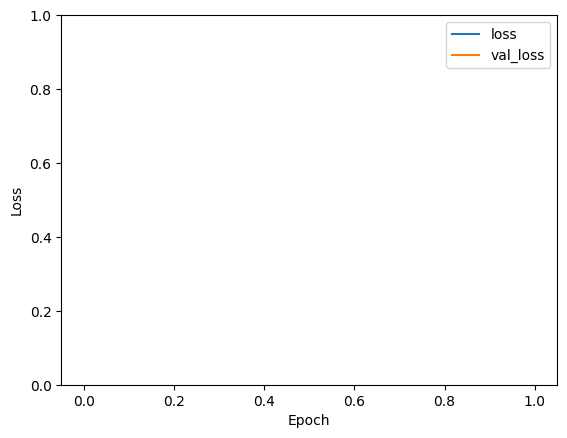

In [38]:
plt.plot([0,1],history.history['loss'], label='loss')
plt.plot([0,1],history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.0, 1])
plt.legend(loc='upper right')

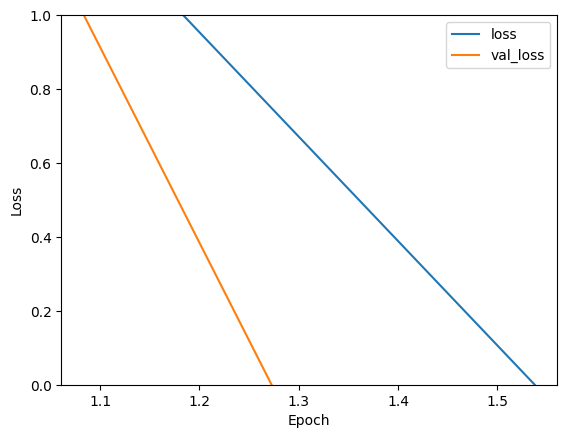

In [39]:
plt.plot(history.history['loss'], [0,1], label='loss')
plt.plot(history.history['val_loss'], [0,1], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.0, 1])
plt.legend(loc='upper right')

In [40]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 1.0837 - accuracy: 0.6173 - 667ms/epoch - 2ms/step


In [41]:
print(test_acc)

0.6172999739646912


## Functional

In [42]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [43]:
input_images = keras.Input(shape=(32, 32, 3), name="img")
model = layers.Conv2D(32, (3, 3), activation="relu", name="conv1")(input_images) # (input_images) input จาก layer ก่อนหน้า
model = layers.MaxPooling2D((2, 2), name="maxpool1")(model)
model = layers.Conv2D(64, (3, 3), activation='relu', name="conv2")(model)
model = layers.MaxPooling2D((2, 2), name="maxpool2")(model)
model = layers.Conv2D(64, (3, 3), activation='relu', name="conv3")(model)
model = layers.Flatten(name="Flatten")(model)
model = layers.Dense(64, activation='relu', name="activation")(model)
output = layers.Dense(10, name="output")(model)

In [44]:
my_model = keras.Model(input_images, output, name = "mymodel")

In [45]:
my_model.summary()

Model: "mymodel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 32, 32, 3)]       0         
                                                                 
 conv1 (Conv2D)              (None, 30, 30, 32)        896       
                                                                 
 maxpool1 (MaxPooling2D)     (None, 15, 15, 32)        0         
                                                                 
 conv2 (Conv2D)              (None, 13, 13, 64)        18496     
                                                                 
 maxpool2 (MaxPooling2D)     (None, 6, 6, 64)          0         
                                                                 
 conv3 (Conv2D)              (None, 4, 4, 64)          36928     
                                                                 
 Flatten (Flatten)           (None, 1024)              0   

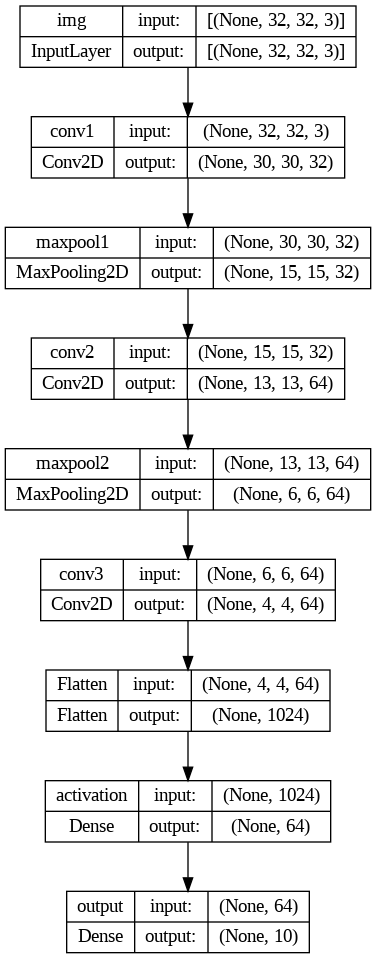

In [46]:
keras.utils.plot_model(my_model, show_shapes=True)

In [47]:
my_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [48]:
history = my_model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.5306 - accuracy: 0.4399 - val_loss: 1.2733 - val_accuracy: 0.5395
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1794 - accuracy: 0.5817 - val_loss: 1.2156 - val_accuracy: 0.5714
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0313 - accuracy: 0.6374 - val_loss: 1.0659 - val_accuracy: 0.6210
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9304 - accuracy: 0.6739 - val_loss: 0.9633 - val_accuracy: 0.6655
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8585 - accuracy: 0.6986 - val_loss: 0.9014 - val_accuracy: 0.6854
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7933 - accuracy: 0.7236 - val_loss: 0.8909 - val_accuracy: 0.6928
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7454 - accuracy: 0.7398 - val_loss: 0.8911 - val_accuracy

313/313 - 1s - loss: 0.8632 - accuracy: 0.7055 - 660ms/epoch - 2ms/step


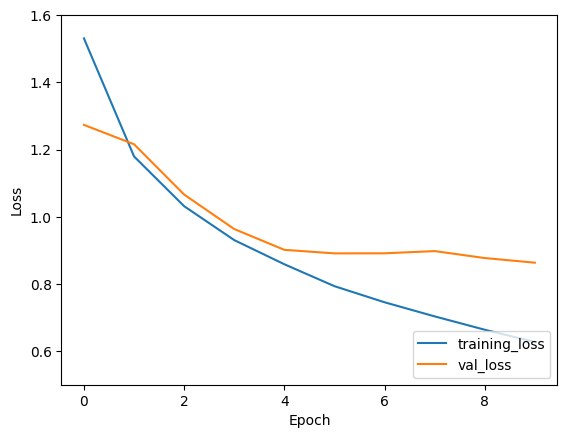

In [49]:
plt.plot(range(10),history.history['loss'], label='training_loss')
plt.plot(range(10),history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.5, 1.6])
plt.legend(loc='lower right')

test_loss, test_acc = my_model.evaluate(test_images,  test_labels, verbose=2)

In [50]:
print(test_acc)

0.7055000066757202


### ResNet

In [51]:
inputs = keras.Input(shape=(32, 32, 3), name="img")
x = layers.Conv2D(32, 3, activation="relu")(inputs)
x = layers.Conv2D(64, 3, activation="relu")(x)
block_1_output = layers.MaxPooling2D(3)(x)

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_2_output = layers.add([x, block_1_output])

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_3_output = layers.add([x, block_2_output])

x = layers.Conv2D(64, 3, activation="relu")(block_3_output)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10)(x)

resnet_model = keras.Model(inputs, outputs, name="toy_resnet")
resnet_model.summary()

Model: "toy_resnet"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 img (InputLayer)            [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d_10 (Conv2D)          (None, 30, 30, 32)           896       ['img[0][0]']                 
                                                                                                  
 conv2d_11 (Conv2D)          (None, 28, 28, 64)           18496     ['conv2d_10[0][0]']           
                                                                                                  
 max_pooling2d_3 (MaxPoolin  (None, 9, 9, 64)             0         ['conv2d_11[0][0]']           
 g2D)                                                                                    

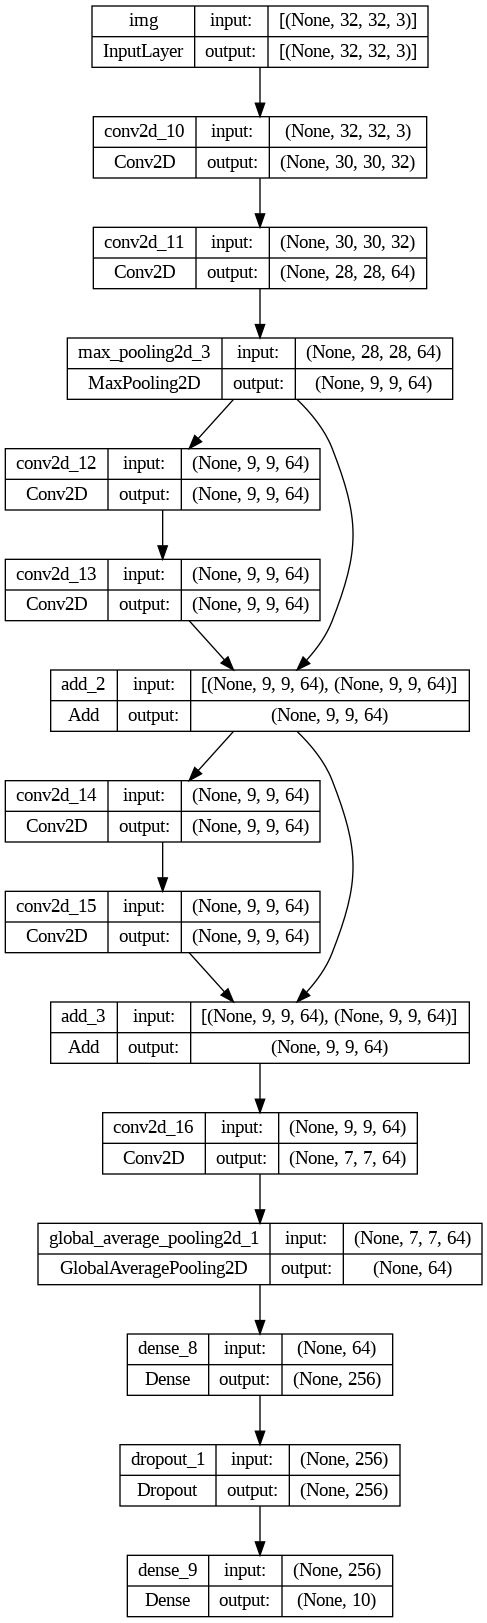

In [52]:
keras.utils.plot_model(resnet_model,  show_shapes=True)

In [53]:
resnet_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [54]:
history = resnet_model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 16s 8ms/step - loss: 1.6642 - accuracy: 0.3628 - val_loss: 1.2288 - val_accuracy: 0.5450
Epoch 2/10
1563/1563 [==============================] - 12s 7ms/step - loss: 1.1605 - accuracy: 0.5810 - val_loss: 0.9963 - val_accuracy: 0.6426
Epoch 3/10
1563/1563 [==============================] - 12s 7ms/step - loss: 0.9619 - accuracy: 0.6563 - val_loss: 0.8715 - val_accuracy: 0.6892
Epoch 4/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8518 - accuracy: 0.7000 - val_loss: 0.8096 - val_accuracy: 0.7128
Epoch 5/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7719 - accuracy: 0.7287 - val_loss: 0.7624 - val_accuracy: 0.7341
Epoch 6/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7013 - accuracy: 0.7546 - val_loss: 0.7247 - val_accuracy: 0.7482
Epoch 7/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.6458 - accuracy: 0.7758 - val_loss: 0.6867 - val_ac

313/313 - 1s - loss: 0.8632 - accuracy: 0.7055 - 655ms/epoch - 2ms/step


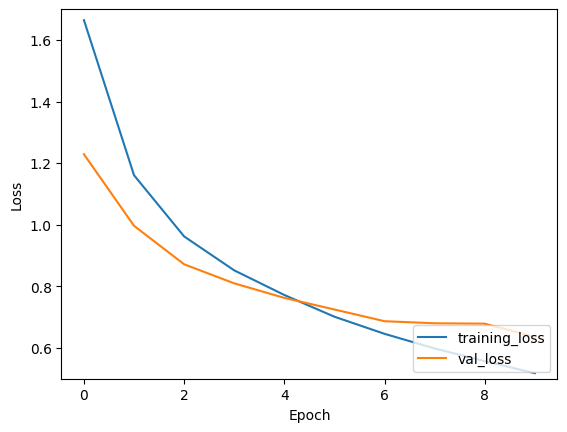

In [55]:
plt.plot(range(10),history.history['loss'], label='training_loss')
plt.plot(range(10),history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.5, 1.7])
plt.legend(loc='lower right')

test_loss, test_acc = my_model.evaluate(test_images,  test_labels, verbose=2)

In [56]:
print(test_acc)

0.7055000066757202


# Tensorflow Data Pipeline

flow from directory

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [57]:
path2data = '/content/drive/My Drive/Classification Dataset'

In [160]:
inputs = keras.Input(shape=(200, 200, 3), name="img")
x = layers.Conv2D(32, 3, activation="relu")(inputs)
x = layers.Conv2D(64, 3, activation="relu")(x)
block_1_output = layers.MaxPooling2D(3)(x)

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_2_output = layers.add([x, block_1_output])

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_3_output = layers.add([x, block_2_output])

x = layers.Conv2D(64, 3, activation="relu")(block_3_output)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(2)(x)

resnet_model_dm = keras.Model(inputs, outputs, name="resnet_dog_muff")
resnet_model_dm.summary()

Model: "resnet_dog_muff"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 img (InputLayer)            [(None, 200, 200, 3)]        0         []                            
                                                                                                  
 conv2d_24 (Conv2D)          (None, 198, 198, 32)         896       ['img[0][0]']                 
                                                                                                  
 conv2d_25 (Conv2D)          (None, 196, 196, 64)         18496     ['conv2d_24[0][0]']           
                                                                                                  
 max_pooling2d_5 (MaxPoolin  (None, 65, 65, 64)           0         ['conv2d_25[0][0]']           
 g2D)                                                                               

In [161]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      #width_shift_range=0.2,
      #height_shift_range=0.2,
      #shear_range=0.2,
      #zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        path2data,
        # All images will be resized to target height and width.
        target_size=(200, 200),
        batch_size=1,
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

# # Note that the validation data should not be augmented!
# test_datagen = ImageDataGenerator(rescale=1./255)
# validation_generator = test_datagen.flow_from_directory(
#         validation_dir,
#         target_size=(height, width),
#         batch_size=batch_size,
#         class_mode='categorical')

Found 30 images belonging to 2 classes.


In [60]:
from tensorflow.keras import optimizers

In [61]:
resnet_model_dm.compile(optimizer=optimizers.Adam(lr=2e-3),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [62]:
history = resnet_model_dm.fit_generator(
      train_generator,
      steps_per_epoch= 30, #ใช้สร้างชุดข้อมูลใน 1 epoch
      epochs=50, #จำนวนครั้งที่โมเดลได้รับการฝึกฝนกับชุดข้อมูลนั้น
      verbose=1)

Epoch 1/50


<ipython-input-62-7f08322b9f09>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = resnet_model_dm.fit_generator(


30/30 [==============================] - 3s 32ms/step - loss: 3.9107 - accuracy: 0.3000
Epoch 2/50
30/30 [==============================] - 1s 39ms/step - loss: 0.7250 - accuracy: 0.5667
Epoch 3/50
30/30 [==============================] - 1s 37ms/step - loss: 0.6913 - accuracy: 0.5000
Epoch 4/50
30/30 [==============================] - 1s 20ms/step - loss: 0.6710 - accuracy: 0.5667
Epoch 5/50
30/30 [==============================] - 1s 20ms/step - loss: 0.7394 - accuracy: 0.5333
Epoch 6/50
30/30 [==============================] - 1s 20ms/step - loss: 0.7283 - accuracy: 0.4667
Epoch 7/50
30/30 [==============================] - 1s 21ms/step - loss: 0.7467 - accuracy: 0.4333
Epoch 8/50
30/30 [==============================] - 1s 21ms/step - loss: 0.6981 - accuracy: 0.6000
Epoch 9/50
30/30 [==============================] - 1s 22ms/step - loss: 0.7186 - accuracy: 0.5000
Epoch 10/50
30/30 [==============================] - 1s 20ms/step - loss: 0.6908 - accuracy: 0.4667
Epoch 11/50
30/30 [=

313/313 - 1s - loss: 0.8632 - accuracy: 0.7055 - 913ms/epoch - 3ms/step


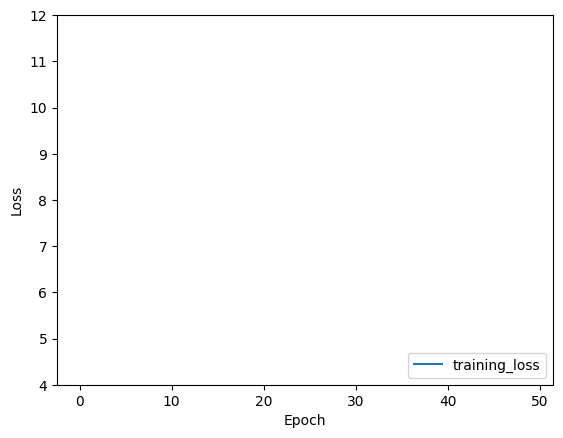

In [63]:
plt.plot(range(50),history.history['loss'], label='training_loss')
#plt.plot(range(50),history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([4, 12])
plt.legend(loc='lower right')

test_loss, test_acc = my_model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 0.8632 - accuracy: 0.7055 - 665ms/epoch - 2ms/step


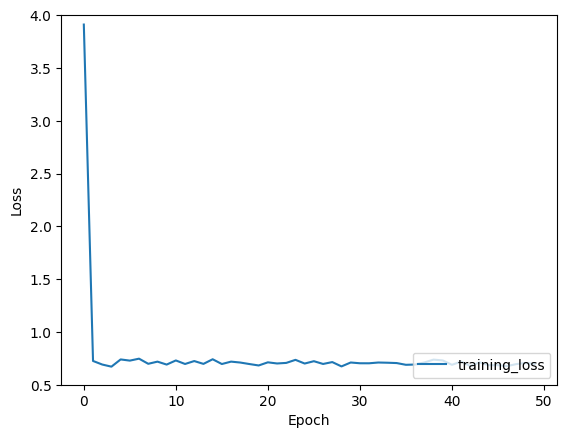

In [64]:
plt.plot(range(50),history.history['loss'], label='training_loss')
#plt.plot(range(50),history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.5, 4])
plt.legend(loc='lower right')

test_loss, test_acc = my_model.evaluate(test_images,  test_labels, verbose=2)

In [162]:
resnet_model_dm.compile(optimizer=optimizers.Adam(lr=2e-6),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [163]:
history = resnet_model_dm.fit_generator(
      train_generator,
      steps_per_epoch=30, #ใช้สร้างชุดข้อมูลใน 1 epoch
      epochs=60, #จำนวนครั้งที่โมเดลได้รับการฝึกฝนกับชุดข้อมูลนั้น
      verbose=1)

Epoch 1/60


<ipython-input-163-6c69ba8b13b2>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = resnet_model_dm.fit_generator(


30/30 [==============================] - 3s 18ms/step - loss: 7.1567 - accuracy: 0.5333
Epoch 2/60
30/30 [==============================] - 1s 20ms/step - loss: 8.0590 - accuracy: 0.5000
Epoch 3/60
30/30 [==============================] - 1s 20ms/step - loss: 9.1367 - accuracy: 0.5000
Epoch 4/60
30/30 [==============================] - 1s 20ms/step - loss: 6.4472 - accuracy: 0.5000
Epoch 5/60
30/30 [==============================] - 1s 20ms/step - loss: 5.4518 - accuracy: 0.5000
Epoch 6/60
30/30 [==============================] - 1s 21ms/step - loss: 7.6236 - accuracy: 0.5000
Epoch 7/60
30/30 [==============================] - 1s 21ms/step - loss: 5.7292 - accuracy: 0.5333
Epoch 8/60
30/30 [==============================] - 1s 28ms/step - loss: 1.8184 - accuracy: 0.3667
Epoch 9/60
30/30 [==============================] - 1s 36ms/step - loss: 0.7462 - accuracy: 0.4333
Epoch 10/60
30/30 [==============================] - 1s 30ms/step - loss: 0.7536 - accuracy: 0.4667
Epoch 11/60
30/30 [=

313/313 - 1s - loss: 0.8632 - accuracy: 0.7055 - 668ms/epoch - 2ms/step


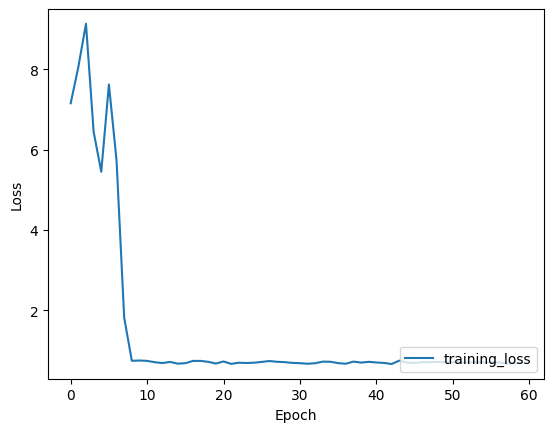

In [168]:
plt.plot(range(60),history.history['loss'], label='training_loss')
#plt.plot(range(50),history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.3, 9.5])
plt.legend(loc='lower right')

test_loss, test_acc = my_model.evaluate(test_images,  test_labels, verbose=2)